In [1]:
import numpy as np
import PIL
import cv2
import matplotlib.pyplot as plt
from dmdlib.ALP import *
%matplotlib inline

In [10]:
dmd = np.array([[1024//2+55, 768//2-20], [1024//2-15, 768//2+1 ], [1024//2-50, 768//2-100]], dtype='float32')
pic = np.array([[699, 623], [955, 1095], [1665, 748]], dtype='float32')

In [11]:
pic_to_dmd = cv2.getAffineTransform(pic, dmd)

In [12]:
from PIL import Image, ImageFont
import numpy as np
import numba

font = ImageFont.load_default()

def make_text_fast(text, array, margins=(10, 10, 150, 150),):
    height, width = array.shape
    mask = font.getmask(text)
    mask_array = np.asarray(mask, dtype=bool)
    mask_array.shape = mask.size[1], mask.size[0]
    top, bottom, left, right = margins
    _array_maker(array, mask_array, top, bottom, left, right, width, height)
    return array

# @numba.jit(nopython=True, parallel=True)
def _array_maker(arrayout, arrayin, top, bottom, left, right, width, height):
    W_margins = width - right - left
    H_margins = height - top - bottom
    mH, mW = arrayin.shape
    W_scale = np.ceil(W_margins / mW)
    H_scale = np.ceil(H_margins / mH)

    for x in range(W_margins):
        x_mask = int(x // W_scale)
        for y in range(H_margins):
            y_mask = int(y // H_scale)
            maskv = arrayin[y_mask, x_mask]
            arrayout[y+top, x+left] = maskv
    return

In [15]:
cam_w = 2048
cam_h = 1536
cam_arr = np.zeros((cam_h, cam_w), dtype='float32')
txtbitmap = make_text_fast('hello', cam_arr, margins=(500,500,500,500))

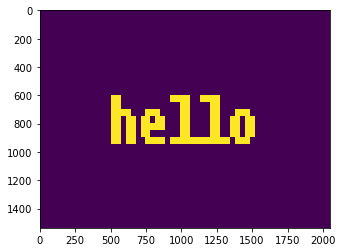

In [16]:
plt.imshow(txtbitmap)

In [17]:
# dmd_arr = np.zeros_like(cam_arr)
dmd_arr = cv2.warpAffine(cam_arr, pic_to_dmd, (1024,768))
dmd_arr *= 255

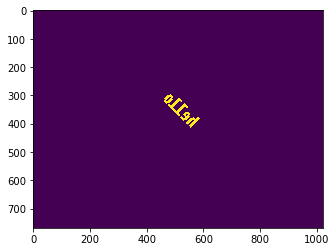

In [18]:
plt.imshow(dmd_arr)

In [19]:
disp_image_pattern(dmd_arr.astype('uint8'))

Device image size is 1024 x 768.
set PROJ_MODE: master 0
Press Enter key to end...


In [20]:
pic_to_dmd

array([[ -9.62608975e-02,  -9.60957844e-02,   6.94154041e+02],
       [ -9.52584255e-02,   9.61571121e-02,   3.70679759e+02]])

In [30]:
import pickle

In [32]:
forsave = {'camera_points': pic, 'dmd_points': dmd, 'cam_to_dmd': pic_to_dmd}

In [42]:
with open('transform.pickle', 'wb') as f:
    pickle.dump(forsave, f)

In [36]:
with open('transform.pickle', 'rb') as f2:
    a = pickle.load(f2)

In [39]:
pwd

'C:\\Users\\labadmin\\Dropbox\\PycharmProjects_ephys\\DmdLib\\testing'

In [41]:
ls

 Volume in drive C is BOOT
 Volume Serial Number is 469D-0D27

 Directory of C:\Users\labadmin\Dropbox\PycharmProjects_ephys\DmdLib\testing

09/15/2017  04:14 PM    <DIR>          .
09/15/2017  04:14 PM    <DIR>          ..
09/15/2017  10:35 AM    <DIR>          .ipynb_checkpoints
09/11/2017  05:00 PM    <DIR>          __pycache__
09/13/2017  11:14 AM            12,917 dmd upload basics.ipynb
09/11/2017  10:45 AM             3,809 dmd upload loop.ipynb
09/15/2017  04:14 PM            20,282 image to dmd transform.ipynb
09/11/2017  10:23 AM            24,684 number image generator.ipynb
09/13/2017  09:00 AM             1,428 progress.ipynb
09/14/2017  09:58 AM            47,547 rand performance testing.ipynb
09/11/2017  04:59 PM             2,704 test_imgen.py
09/11/2017  10:06 AM             2,129 test_imgen.pyc
09/15/2017  04:05 PM               431 transform.json
09/11/2017  10:45 AM             1,410 tt.ipynb
09/11/2017  01:39 PM               582 Untitled.ipynb
09/14/2017  09:47 AM